# 3. Cluster analysis

General info may be found in the following blogposts:  
https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/  
https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/  
https://towardsdatascience.com/machine-learning-algorithms-part-12-hierarchical-agglomerative-clustering-example-in-python-1e18e0075019  
https://medium.com/@sametgirgin/hierarchical-clustering-model-in-5-steps-with-python-6c45087d4318  

**Remark**  
Not sure if GJ said to use clr or pca for clustering, pca was used here as example.

In [6]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

from sklearn.cluster import AgglomerativeClustering

In [2]:
import prepostprocessing.pre_processing as preproc

In [10]:
pca_df_area1 = preproc.load_obj("mineralogy_pca_area1_df")
metadata_area1 = preproc.load_obj("metadata_area1")

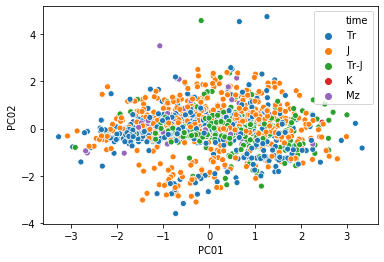

In [15]:
sns.scatterplot(x="PC01", y="PC02", data=pca_df_area1, hue=metadata_area1["time"])
plt.show();

In [18]:
def create_dendrogram(data, linkage_method='single', save=""):
    """Plot dendrogram
    
    Parameters:
    -----------
    data : array or DataFrame
        Data to be clustered
    linkage_method : str (optional)
        Method to use to construct the linkage matrix
        Choose between ['single', 'complete', 'average',
        'weighted', 'centroid', 'median', 'ward']
        For detailed information see 
        https://docs.scipy.org/doc/scipy-0.14.0/reference/ \
        generated/scipy.cluster.hierarchy.linkage.html
    save : str (optional)
        Name to use for figure file when saving
    """
    
    linkage_matrix = linkage(data, linkage_method)
    c, coph_dists = cophenet(linkage_matrix, pdist(data))
    print("Cophenetic correlation coefficient:", c)
    
    plt.figure(figsize=(25, 10))
    dendrogram(linkage_matrix, labels=data.index)
    if save != "":
        plt.savefig(f"../_FIGURES/{save}.pdf")
    plt.show()

Cophenetic correlation coefficient: 0.4004858931821458


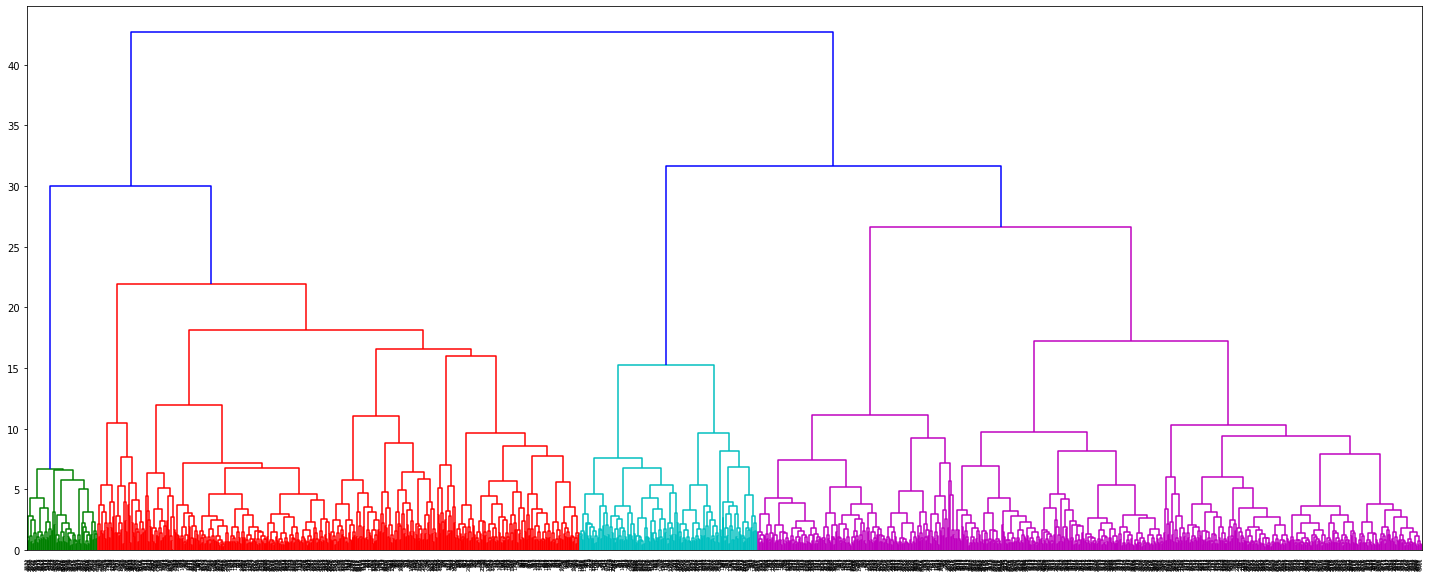

Wall time: 26.8 s


In [20]:
%%time
create_dendrogram(pca_df_area1, linkage_method='ward')

In [54]:
X = pca_df_area1.values

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)

array([2, 2, 2, ..., 1, 1, 1], dtype=int64)

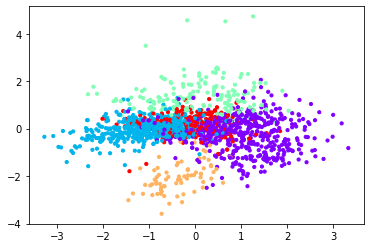

In [55]:
plt.scatter(X[:,0], X[:,1], c=cluster.labels_, cmap='rainbow', s=10)
plt.show();